In [1]:
import pandas as pd # pandas 불러오기
from matplotlib import pyplot as plt # plt 불러오기

In [2]:
who = pd.read_csv("C:/Users/juhyj/Desktop/WHO_Life_Expectancy_2015.csv") # 2015년 WHO csv파일 불러오기
who.shape

(183, 23)

In [3]:
who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Density
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,52.712072
1,Albania,2015,Developing,77.8,74,0,4.60,364.975229,99.0,0,...,6.00,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,105.135146
2,Algeria,2015,Developing,75.6,19,21,NaN,0.000000,95.0,63,...,NaN,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,16.680246
3,Angola,2015,Developing,52.4,335,66,NaN,0.000000,64.0,118,...,NaN,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,22.366553
4,Antigua and Barbuda,2015,Developing,76.4,13,0,NaN,0.000000,99.0,0,...,NaN,99,0.2,13566.954100,93566.0,3.3,3.3,0.784,13.9,212.650000


In [4]:
print(who.info())   # 데이터 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    int64  
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          6 non-null      float64
 7   percentage expenditure           183 non-null    float64
 8   Hepatitis B                      174 non-null    float64
 9   Measles                          183 non-null    int64  
 10   BMI                             181 non-null    float64
 11  under-five deaths                183 non-null    int64  
 12  Polio                 

In [5]:
# 변수 이름 정리하기
who.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1_to_19_years",
                                  " thinness 5-9 years":"Thinness_5_to_9_years",
                                  " HIV/AIDS":"HIV_AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [6]:
#구체적인 설명이 필요한  변수들

#Adult_Mortality: 1000명당 15-60세 사망자 수 
#Infant_deaths: 1000명당 유아 사망자 수
#Percentage_expenditure: 1인당 GDP 대비 보건 지출 비율(?)
#HepatitisB: 1세 B형 간염 예방접종률 
#Under_five_deats: 1000명 당 5세 이하 사망자 수
#Polio: 1세 소아마이 예방접종률 
#Diphtheria: 1세 디프테리아 예방접종률
#HIV_AIDS: 0 - 4세 1000명당 HIV/AIDS 사망자 수 
#GDP: 1인당 GDP (미국 달러)
#Thinness_1_to_19_years: 10 - 19세 마름? 저체중? 빈약? 비율 %
#Thinness_5_to_9_years: 5 - 9세 위와 동일
#Income_composition_of_resources: UN HDI(인간개발지수) in terms of income composition of resources (index ranging from 0 to 1)??? 찾아보니 1인당 GNI가 주로 반영된 것 같네요... GNI는 국민들의 전반적인 소득수준을 파악하는 데 좋다고 합니다
#Schooling: 학교 교육 년수 

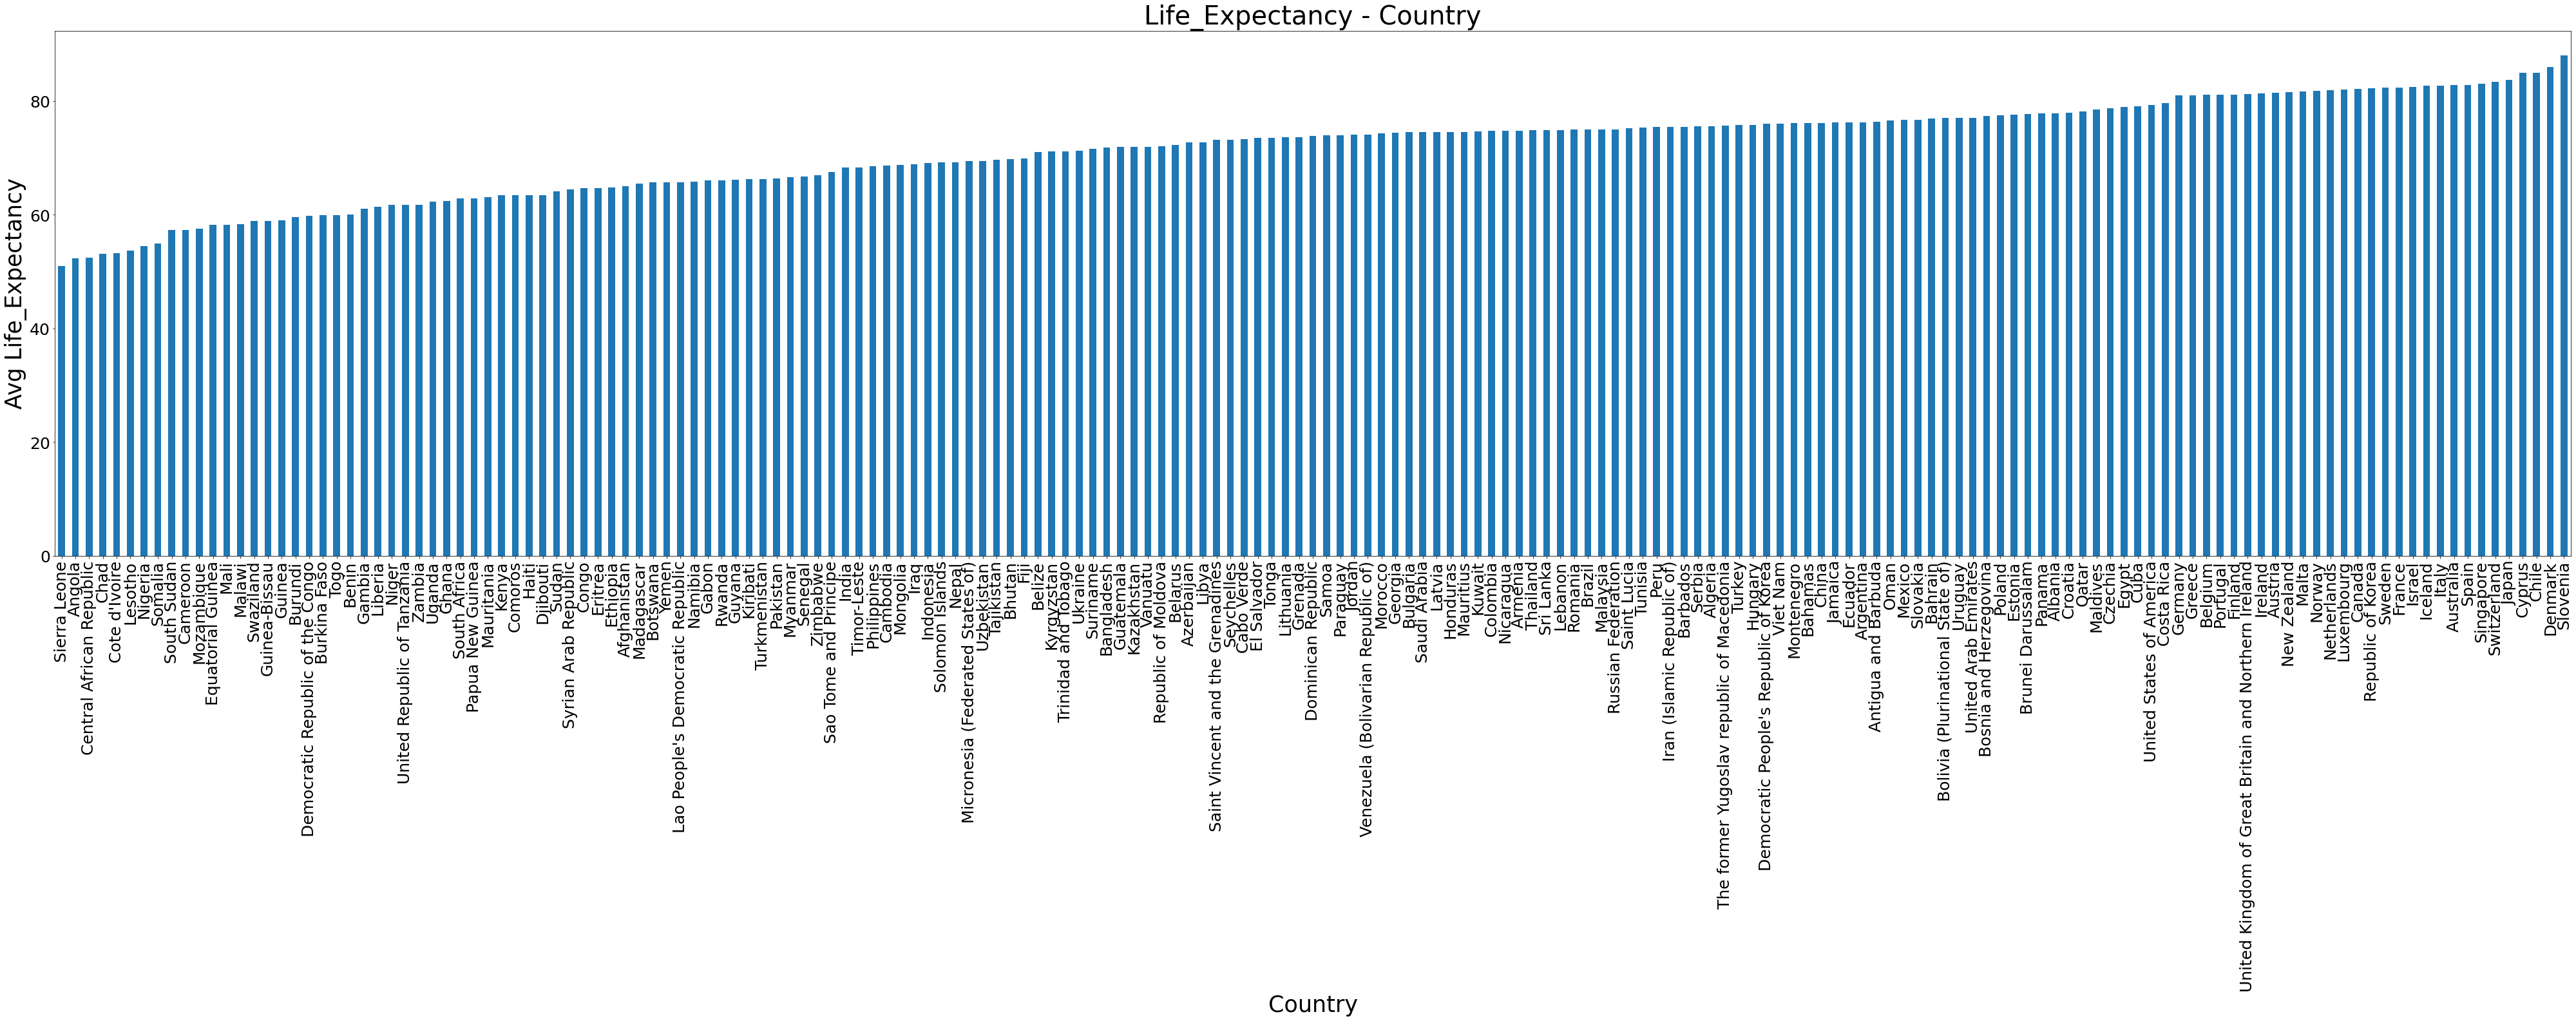

In [7]:
# 국가 별 기대수명 시각화
LE_by_country = who.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=True)
LE_by_country.plot(kind='bar', figsize=(70,15), fontsize=25)
plt.title("Life_Expectancy - Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

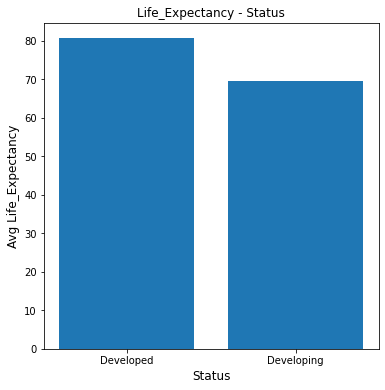

In [8]:
# Status 여부에 따른 기대수명 차이 확인
plt.figure(figsize=(6,6))
plt.bar(who.groupby('Status')['Status'].count().index,who.groupby('Status')['Life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

In [9]:
who = who.drop(['Year'], axis=1) # 불필요한 연도, 국가 변수 제거
who = who.drop(['Country'], axis = 1) 

In [10]:
who.describe() # 결측 제거 전 통계량 확인

,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_years,Thinness_5_to_9_years,Income_composition_of_resources,Schooling,Density
count,183.000000,183.000000,183.000000,6.000000,183.000000,174.000000,183.000000,181.000000,183.000000,183.000000,2.000000,183.000000,183.000000,160.000000,1.830000e+02,181.000000,181.000000,173.000000,173.000000,183.000000
mean,71.616940,152.863388,23.803279,5.288333,2.383906,82.425287,1502.901639,42.754144,31.612022,83.207650,7.080000,84.633880,0.660656,8142.194306,1.431730e+07,4.534807,4.575691,0.691740,12.927168,197.853279
std,8.123706,97.561184,83.683762,4.038115,27.461032,24.008492,7842.394928,20.685702,107.779778,24.245778,1.527351,22.162793,1.344702,12769.593873,3.641957e+07,4.099425,4.180785,0.153412,2.912366,618.502182
min,51.000000,1.000000,0.000000,0.010000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,1.925464
25%,65.750000,74.000000,0.000000,2.492500,0.000000,78.750000,0.000000,24.300000,0.000000,83.000000,6.540000,83.500000,0.100000,782.273120,3.564730e+05,1.500000,1.500000,0.565000,10.800000,31.443366
50%,73.900000,138.000000,2.000000,5.285000,0.000000,93.000000,17.000000,48.600000,3.000000,93.000000,7.080000,93.000000,0.100000,3515.980304,3.431552e+06,3.500000,3.400000,0.723000,13.100000,80.665043
75%,76.950000,213.000000,17.000000,8.017500,0.000000,97.000000,202.000000,61.400000,21.000000,97.000000,7.620000,97.000000,0.400000,8853.934073,1.145187e+07,6.500000,6.400000,0.798000,15.000000,183.033755
max,88.000000,484.000000,910.000000,10.660000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,8.160000,99.000000,9.300000,66346.522670,3.214188e+08,26.700000,27.300000,0.948000,20.400000,7806.772920


In [11]:
who.nunique()  # 항목 별 unique한 요소의 개수

Status                               2
Life_expectancy                    132
Adult_mortality                    130
Infant_deaths                       52
Alcohol                              6
Percentage_expenditure               3
HepatitisB                          44
Measles                             98
BMI                                141
Under_five_deaths                   54
Polio                               42
Total_expenditure                    2
Diphtheria                          43
HIV_AIDS                            33
GDP                                160
Population                         183
Thinness_1_to_19_years              77
Thinness_5_to_9_years               85
Income_composition_of_resources    148
Schooling                           89
Density                            183
dtype: int64

In [12]:
who['Status'].unique() 

array(['Developing', 'Developed'], dtype=object)

In [13]:
status_aliases = {'Developing':0, 'Developed':1} # 'Status' 항목을 수치형 항목으로 변환

who['Status'] = who['Status'].apply(lambda v: status_aliases.get(v,v))

In [14]:
who.isnull().sum() # 항목별 결측 확인

Status                               0
Life_expectancy                      0
Adult_mortality                      0
Infant_deaths                        0
Alcohol                            177
Percentage_expenditure               0
HepatitisB                           9
Measles                              0
BMI                                  2
Under_five_deaths                    0
Polio                                0
Total_expenditure                  181
Diphtheria                           0
HIV_AIDS                             0
GDP                                 23
Population                           0
Thinness_1_to_19_years               2
Thinness_5_to_9_years                2
Income_composition_of_resources     10
Schooling                           10
Density                              0
dtype: int64

In [15]:
who = who.drop(['Alcohol', 'Total_expenditure'], axis=1) #  Alcohol과 Total_expenditure 변수의 결측이 너무 많으므로 제거.

In [16]:
who['Percentage_expenditure'] # Percentage_expenditure 값들이 대부분 0이여서 삭제하는 것이 좋아보입니다.

0       71.279624
1      364.975229
2        0.000000
3        0.000000
4        0.000000
          ...    
178      0.000000
179      0.000000
180      0.000000
181      0.000000
182      0.000000
Name: Percentage_expenditure, Length: 183, dtype: float64

In [17]:
who = who.drop(['Percentage_expenditure'], axis=1) # Percentage_expenditure 삭제

In [18]:
who.corr() # 결측 제거 전 상관계수

,Status,Life_expectancy,Adult_mortality,Infant_deaths,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_years,Thinness_5_to_9_years,Income_composition_of_resources,Schooling,Density
Status,1.000000,0.516657,-0.369002,-0.124752,0.122388,-0.081324,0.292940,-0.129101,0.225702,0.221115,-0.192463,0.410997,0.095434,-0.371305,-0.375223,0.558068,0.557994,0.184630
Life_expectancy,0.516657,1.000000,-0.779119,-0.241290,0.420848,-0.074617,0.516663,-0.271921,0.515602,0.500300,-0.608345,0.470440,0.022011,-0.475020,-0.475027,0.907364,0.818159,0.170742
Adult_mortality,-0.369002,-0.779119,1.000000,0.188205,-0.231715,0.051196,-0.369920,0.212004,-0.372392,-0.322688,0.621012,-0.362322,-0.030162,0.298016,0.302699,-0.657258,-0.546178,-0.157340
Infant_deaths,-0.124752,-0.241290,0.188205,1.000000,-0.086902,0.800859,-0.223562,0.994196,-0.129729,-0.117989,0.095837,-0.122934,0.220640,0.530544,0.530548,-0.207522,-0.208149,0.005460
HepatitisB,0.122388,0.420848,-0.231715,-0.086902,1.000000,0.015642,0.179551,-0.104716,0.594559,0.915220,-0.383792,0.161423,0.003804,-0.057951,-0.099965,0.327169,0.334051,0.100551
Measles,-0.081324,-0.074617,0.051196,0.800859,0.015642,1.000000,-0.128184,0.764908,-0.028342,-0.001623,-0.026580,-0.082470,0.084750,0.343274,0.338294,-0.074674,-0.067796,0.003339
BMI,0.292940,0.516663,-0.369920,-0.223562,0.179551,-0.128184,1.000000,-0.234982,0.212450,0.197686,-0.292453,0.372604,0.050677,-0.472508,-0.489716,0.589784,0.566204,-0.019072
Under_five_deaths,-0.129101,-0.271921,0.212004,0.994196,-0.104716,0.764908,-0.234982,1.000000,-0.147457,-0.137863,0.122604,-0.129160,0.244296,0.522142,0.521006,-0.229571,-0.227530,0.001549
Polio,0.225702,0.515602,-0.372392,-0.129729,0.594559,-0.028342,0.212450,-0.147457,1.000000,0.661635,-0.403233,0.253588,-0.117357,-0.194518,-0.196669,0.464525,0.408363,0.099710
Diphtheria,0.221115,0.500300,-0.322688,-0.117989,0.915220,-0.001623,0.197686,-0.137863,0.661635,1.000000,-0.441413,0.241453,-0.000840,-0.113999,-0.157038,0.431936,0.410833,0.096429


In [19]:
who.isnull().sum()

Status                              0
Life_expectancy                     0
Adult_mortality                     0
Infant_deaths                       0
HepatitisB                          9
Measles                             0
BMI                                 2
Under_five_deaths                   0
Polio                               0
Diphtheria                          0
HIV_AIDS                            0
GDP                                23
Population                          0
Thinness_1_to_19_years              2
Thinness_5_to_9_years               2
Income_composition_of_resources    10
Schooling                          10
Density                             0
dtype: int64

In [20]:
# 결측 평균으로 채우기

who['HepatitisB'] = who['HepatitisB'].fillna(who['HepatitisB'].mean())
who['BMI'] = who['BMI'].fillna(who['BMI'].mean())
who['GDP'] = who['GDP'].fillna(who['GDP'].mean())
who['Thinness_1_to_19_years'] = who['Thinness_1_to_19_years'].fillna(who['Thinness_1_to_19_years'].mean())
who['Thinness_5_to_9_years'] = who['Thinness_5_to_9_years'].fillna(who['Thinness_5_to_9_years'].mean())
who['Income_composition_of_resources'] = who['Income_composition_of_resources'].fillna(who['Income_composition_of_resources'].mean())
who['Schooling'] = who['Schooling'].fillna(who['Schooling'].mean())

In [21]:
who.isnull().sum()

Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Thinness_1_to_19_years             0
Thinness_5_to_9_years              0
Income_composition_of_resources    0
Schooling                          0
Density                            0
dtype: int64

In [22]:
who.describe() # 결측 제거 후 통계량 확인

,Status,Life_expectancy,Adult_mortality,Infant_deaths,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_years,Thinness_5_to_9_years,Income_composition_of_resources,Schooling,Density
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.174863,71.616940,152.863388,23.803279,82.425287,1502.901639,42.754144,31.612022,83.207650,84.633880,0.660656,8142.194306,1.431730e+07,4.534807,4.575691,0.691740,12.927168,197.853279
std,0.380892,8.123706,97.561184,83.683762,23.407349,7842.394928,20.571730,107.779778,24.245778,22.162793,1.344702,11935.481755,3.641957e+07,4.076838,4.157750,0.149138,2.831225,618.502182
min,0.000000,51.000000,1.000000,0.000000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,4.900000,1.925464
25%,0.000000,65.750000,74.000000,0.000000,81.000000,0.000000,24.300000,0.000000,83.000000,83.500000,0.100000,1152.309599,3.564730e+05,1.500000,1.500000,0.575500,11.100000,31.443366
50%,0.000000,73.900000,138.000000,2.000000,92.000000,17.000000,48.600000,3.000000,93.000000,93.000000,0.100000,4132.762920,3.431552e+06,3.500000,3.400000,0.718000,12.927168,80.665043
75%,0.000000,76.950000,213.000000,17.000000,97.000000,202.000000,61.350000,21.000000,97.000000,97.000000,0.400000,8142.194306,1.145187e+07,6.500000,6.400000,0.794500,14.850000,183.033755
max,1.000000,88.000000,484.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,66346.522670,3.214188e+08,26.700000,27.300000,0.948000,20.400000,7806.772920


In [23]:
who.corr()  # 결측 제거 후 항목 별 상관계수

,Status,Life_expectancy,Adult_mortality,Infant_deaths,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_years,Thinness_5_to_9_years,Income_composition_of_resources,Schooling,Density
Status,1.000000,0.516657,-0.369002,-0.124752,0.108337,-0.081324,0.292597,-0.129101,0.225702,0.221115,-0.192463,0.404688,0.095434,-0.370870,-0.374784,0.533588,0.533518,0.184630
Life_expectancy,0.516657,1.000000,-0.779119,-0.241290,0.398488,-0.074617,0.510951,-0.271921,0.515602,0.500300,-0.608345,0.446820,0.022011,-0.469768,-0.469775,0.861431,0.776743,0.170742
Adult_mortality,-0.369002,-0.779119,1.000000,0.188205,-0.227031,0.051196,-0.365879,0.212004,-0.372392,-0.322688,0.621012,-0.341132,-0.030162,0.294761,0.299392,-0.627878,-0.521763,-0.157340
Infant_deaths,-0.124752,-0.241290,0.188205,1.000000,-0.086727,0.800859,-0.223459,0.994196,-0.129729,-0.117989,0.095837,-0.120144,0.220640,0.530298,0.530302,-0.203145,-0.203758,0.005460
HepatitisB,0.108337,0.398488,-0.227031,-0.086727,1.000000,0.015627,0.171990,-0.104492,0.590183,0.909236,-0.382053,0.146708,0.003774,-0.055650,-0.096178,0.307283,0.311093,0.100441
Measles,-0.081324,-0.074617,0.051196,0.800859,0.015627,1.000000,-0.128157,0.764908,-0.028342,-0.001623,-0.026580,-0.081242,0.084750,0.343201,0.338223,-0.074456,-0.067598,0.003339
BMI,0.292597,0.510951,-0.365879,-0.223459,0.171990,-0.128157,1.000000,-0.234819,0.210572,0.194388,-0.289027,0.353726,0.050665,-0.472508,-0.489716,0.567824,0.534174,-0.019063
Under_five_deaths,-0.129101,-0.271921,0.212004,0.994196,-0.104492,0.764908,-0.234819,1.000000,-0.147457,-0.137863,0.122604,-0.126107,0.244296,0.521780,0.520645,-0.224444,-0.222449,0.001549
Polio,0.225702,0.515602,-0.372392,-0.129729,0.590183,-0.028342,0.210572,-0.147457,1.000000,0.661635,-0.403233,0.235286,-0.117357,-0.192798,-0.194931,0.459159,0.403647,0.099710
Diphtheria,0.221115,0.500300,-0.322688,-0.117989,0.909236,-0.001623,0.194388,-0.137863,0.661635,1.000000,-0.441413,0.227161,-0.000840,-0.112097,-0.154418,0.425316,0.404536,0.096429


In [24]:
from sklearn.linear_model import LinearRegression # sklearn 라이브러리를 이용한 선형회귀분석
from sklearn.model_selection import train_test_split # 데이터셋 분리 작업

In [25]:
Y = who['Life_expectancy']
X = who.drop(['Life_expectancy'], axis = 1)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((146, 17), (37, 17), (146,), (37,))

In [28]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [29]:
Y_predict = lm.predict(X_test)

In [30]:
import numpy as np
coef = pd.Series(data = np.round(lm.coef_,3), index = X.columns)
coef #선형회귀 방정식은 다음과 같은 계수를 가진다
# 결과가 이상합니다.. 

Status                              2.094
Adult_mortality                    -0.026
Infant_deaths                       0.336
HepatitisB                          0.035
Measles                            -0.000
BMI                                -0.007
Under_five_deaths                  -0.271
Polio                               0.020
Diphtheria                          0.006
HIV_AIDS                           -0.597
GDP                                 0.000
Population                          0.000
Thinness_1_to_19_years             -0.120
Thinness_5_to_9_years               0.009
Income_composition_of_resources    22.181
Schooling                           0.051
Density                             0.000
dtype: float64

In [31]:
intercept = np.round(lm.intercept_,2) # intercept는 다음과 같다.
intercept

55.64

In [32]:
from sklearn.metrics import mean_squared_error, r2_score # # MSE(mean squared erroe), R-square (모형 성능 확인)

In [33]:
# MSE 와 R-square 방법을 통해 정확도 평가 ; MSE, R-sqaure 모두 값이 현저히 떨어졌습니다.

mse = mean_squared_error(Y_test, Y_predict)  
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-square : {0:.3f}'.format(r_square))

MSE : 47.815, RMSE : 6.915
R-square : 0.292


In [34]:
# 기대수명과 나머지 변수 간 관계에 대한 산점도와 선형 회귀 그래프 (시각화)

import matplotlib.pyplot as plt
import seaborn as sns

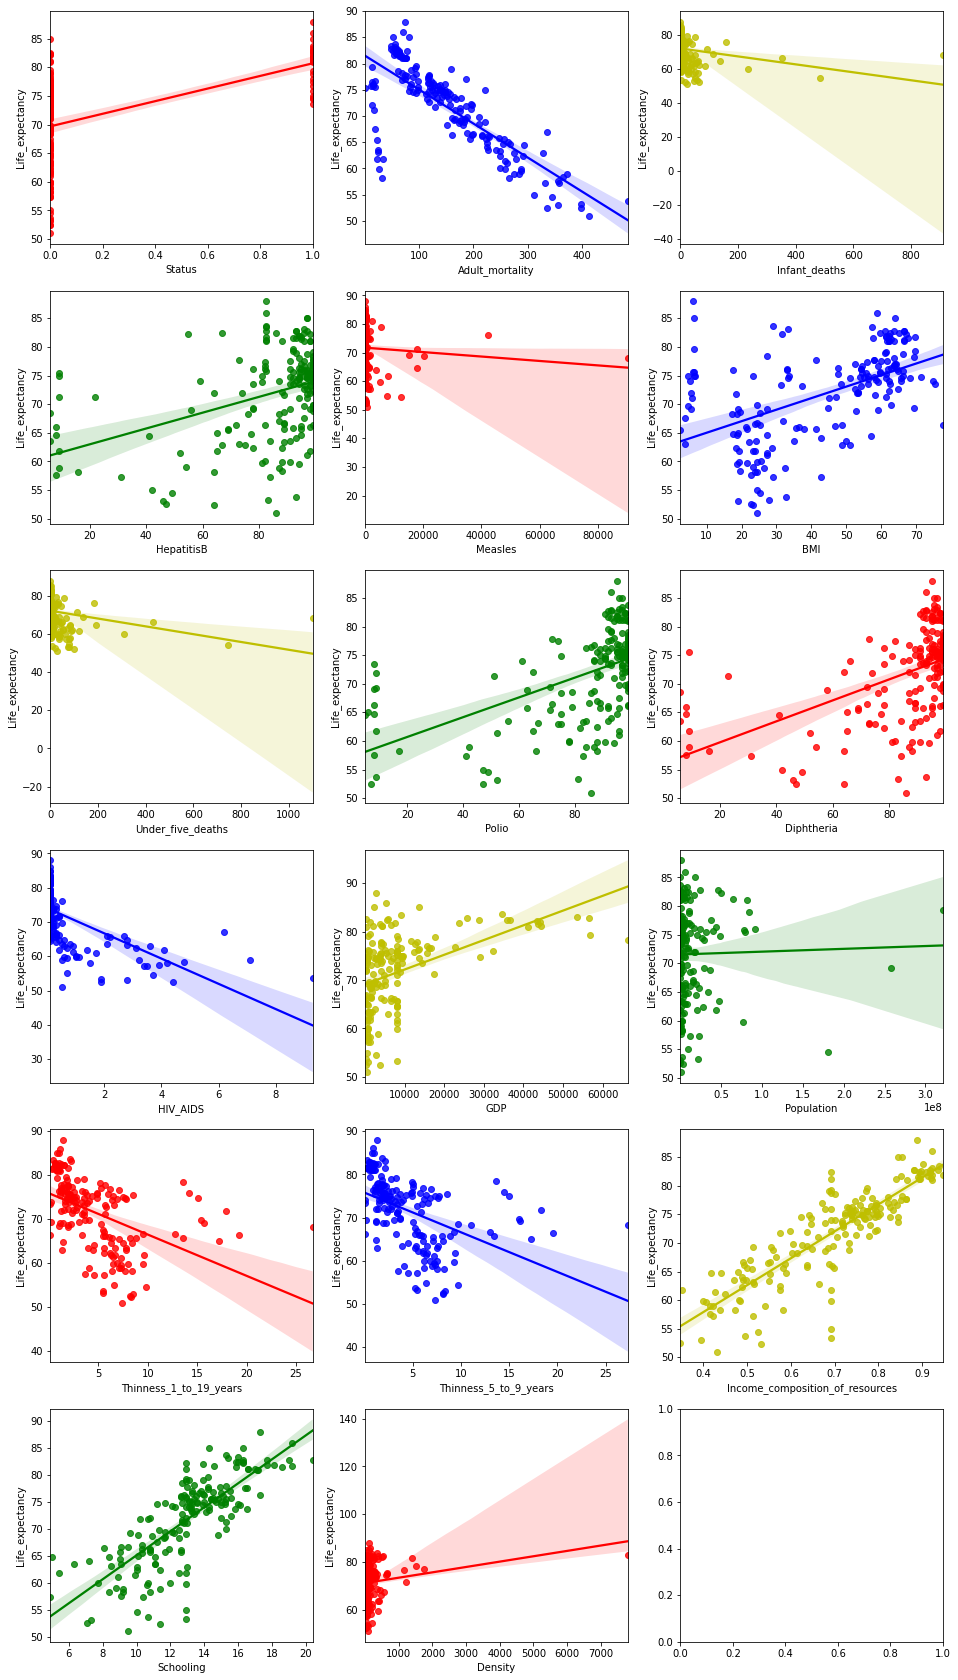

In [35]:
fig, axs = plt.subplots(figsize = (16, 30), ncols = 3, nrows = 6)
x_features = [ 'Status', 'Adult_mortality', 'Infant_deaths', 'HepatitisB', 'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_years', 'Thinness_5_to_9_years', 'Income_composition_of_resources', 'Schooling', 'Density']
plot_color = ['r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'Life_expectancy', data = who, ax = axs[row][col], color = plot_color[i])

In [36]:
# statsmodels ols를 사용한 회귀분석; 이 방법이 역시 결과가 이상하긴 하지만 R-square는 0.873으로 높게 나오네요..
from statsmodels.formula.api import ols, glm

In [37]:
rm_Life_expectancy = 'Life_expectancy ~ Status + Adult_mortality + Infant_deaths + HepatitisB + Measles + BMI + Under_five_deaths + Polio + Diphtheria + HIV_AIDS + GDP + Population + Thinness_1_to_19_years + Thinness_5_to_9_years +  Income_composition_of_resources + Schooling + Density'
rm_Life_expectancy_ols = ols(rm_Life_expectancy, data = who)
rm_Life_expectancy_result = rm_Life_expectancy_ols.fit()
rm_Life_expectancy_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     66.55
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           1.24e-64
Time:                        01:33:21   Log-Likelihood:                -453.89
No. Observations:                 183   AIC:                             943.8
Df Residuals:                     165   BIC:                             1002.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          54.8730      2.135     25.697      0.000      50.657      59.089
Status                              1.3456      0.757      1.777      0.077      -0.149       2.841
Adult_mortality                    -0.0267      0.004     -7.589      0.000      -0.034      -0.020
Infant_deaths                       0.0866      0.034      2.569      0.011       0.020       0.153
HepatitisB                          0.0298      0.025      1.209      0.228      -0.019       0.078
Measles                         -2.228e-05   5.76e-05     -0.386      0.700      -0.000    9.15e-05
BMI                                 0.0005      0.015      0.034      0.973      -0.028       0.029
Under_five_deaths                  -0.0674      0.024     -2.778      0.006      -0.115      -0.019
Polio                               0.0149      0.013      1.122      0.263      -0.011       0.041
Diphtheria                          0.0044      0.029      0.155      0.877      -0.052       0.061
HIV_AIDS                           -0.4599      0.235     -1.958      0.052      -0.924       0.004
GDP                               1.13e-05   2.44e-05      0.463      0.644   -3.69e-05    5.95e-05
Population                       6.866e-09   7.15e-09      0.961      0.338   -7.24e-09     2.1e-08
Thinness_1_to_19_years             -0.2020      0.256     -0.790      0.431      -0.707       0.303
Thinness_5_to_9_years               0.0247      0.253      0.098      0.922      -0.474       0.524
Income_composition_of_resources    24.7934      4.685      5.292      0.000      15.543      34.044
Schooling                           0.0256      0.214      0.120      0.905      -0.396       0.447
Density                             0.0002      0.000      0.400      0.690      -0.001       0.001
==============================================================================
Omnibus:                       10.556   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.560
Skew:                          -0.366   Prob(JB):                     0.000689
Kurtosis:                       4.172   Cond. No.                     8.32e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

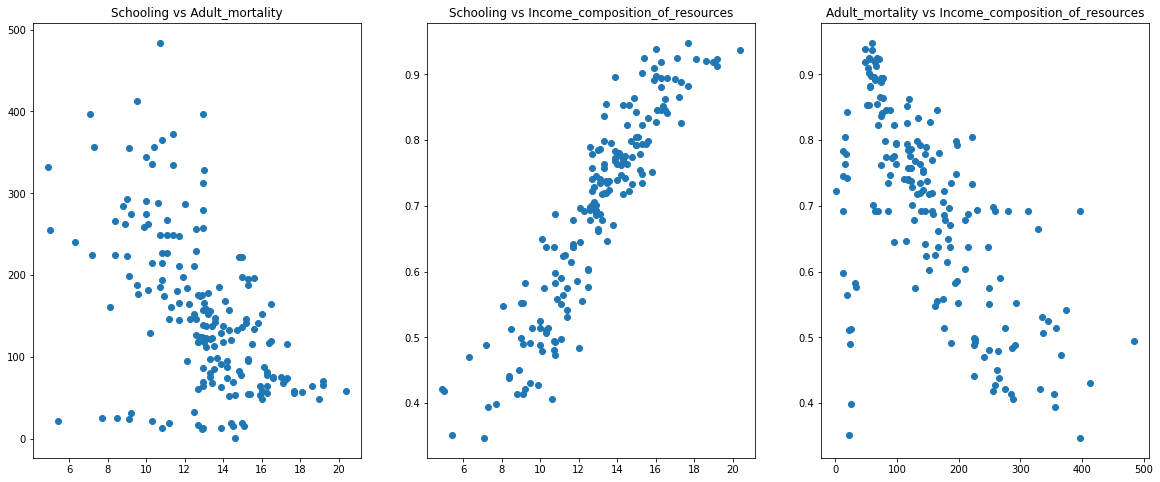

In [38]:
# 다중공선성 확인을 위해 상관관계 살피기 ; Schooling과 ICOR는 양의 상관관계가 있고, 각각은 Adult_Mortality 와 음의 상관관계가 있다.
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(who["Schooling"], who["Adult_mortality"])
plt.title("Schooling vs Adult_mortality")

plt.subplot(1,3,2)
plt.scatter(who["Schooling"], who["Income_composition_of_resources"])
plt.title("Schooling vs Income_composition_of_resources")

plt.subplot(1,3,3)
plt.scatter(who["Adult_mortality"], who["Income_composition_of_resources"])
plt.title("Adult_mortality vs Income_composition_of_resources")

plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF 확인을 위한 라이브러리 불러오기

In [40]:
pd.DataFrame({'Features': column, 'VIF': variance_inflation_factor(rm_Life_expectancy_ols.exog, i)} 
             for i, column in enumerate(rm_Life_expectancy_ols.exog_names)
             if column != 'Intercept')  

# 독립변수 별 VIF 값. 
# Infant_deaths 와 Under_five_deaths가 비슷하다. 생각해보니 둘이 거의 비슷한 내용을 담고 있을 듯 하다
# Thinness_1_to_19_years와 Thinness_5_to_9_years 역시 VIF 값이 비슷하고, 생각해보니 이번에는 아예 한쪽(1-19세)이 다른 쪽(5-9세)을 포함하고 있었다
# Income_composition_of_resources와 Schooling 역시 비슷하다.

,Features,VIF
0,Status,1.633846
1,Adult_mortality,2.308682
2,Infant_deaths,156.200484
3,HepatitisB,6.521595
4,Measles,4.013301
5,BMI,1.760265
6,Under_five_deaths,134.248748
7,Polio,2.045463
8,Diphtheria,7.857259
9,HIV_AIDS,1.958979


In [41]:
# VIF를 참고하여 Infant_deaths, Thinness_5_to_9_years, ICOR(또는 Schooling)을 제거하고 다시 회귀분석을 진행

In [42]:
# csv 파일 다시 불러오기
who = pd.read_csv("C:/Users/juhyj/Desktop/WHO_Life_Expectancy_2015.csv")

In [43]:
# 변수 이름 정리하기
who.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1_to_19_years",
                                  " thinness 5-9 years":"Thinness_5_to_9_years",
                                  " HIV/AIDS":"HIV_AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [44]:
who = who.drop(['Year'], axis=1) # 불필요한 연도, 국가 변수 제거
who = who.drop(['Country'], axis = 1) 

In [45]:
status_aliases = {'Developing':0, 'Developed':1} # 'Status' 항목을 수치형 항목으로 변환

who['Status'] = who['Status'].apply(lambda v: status_aliases.get(v,v))

In [46]:
who = who.drop(['Alcohol', 'Total_expenditure'], axis=1) #  Alcohol과 Total_expenditure 변수의 결측이 너무 많으므로 제거.

In [47]:
who = who.drop(['Percentage_expenditure'], axis=1) # Percentage_expenditure 삭제

# 다중공선성 해결을 위해 drop 
who = who.drop(['Infant_deaths'], axis=1)
who = who.drop(['Thinness_5_to_9_years'], axis=1)
who = who.drop(['Income_composition_of_resources'], axis=1)

In [48]:
# 결측 평균으로 채우기

who['HepatitisB'] = who['HepatitisB'].fillna(who['HepatitisB'].mean())
who['BMI'] = who['BMI'].fillna(who['BMI'].mean())
who['GDP'] = who['GDP'].fillna(who['GDP'].mean())
who['Thinness_1_to_19_years'] = who['Thinness_1_to_19_years'].fillna(who['Thinness_1_to_19_years'].mean())
who['Schooling'] = who['Schooling'].fillna(who['Schooling'].mean())

In [49]:
# 데이터들의 극단치 제거

who=who.loc[who["Population"]<1093859294]
who=who.loc[who['Measles']<=2000]
who=who.loc[who['Under_five_deaths']<200]
who=who.loc[who['GDP']<20000]
who=who.loc[who['Density']<1500]

In [50]:
from sklearn.linear_model import LinearRegression # sklearn 라이브러리를 이용한 선형회귀분석
from sklearn.model_selection import train_test_split # 데이터셋 분리 작업

In [51]:
Y = who['Life_expectancy']
X = who.drop(['Life_expectancy'], axis = 1)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [53]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 14), (31, 14), (120,), (31,))

In [54]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [55]:
Y_predict = lm.predict(X_test)

In [56]:
import numpy as np
coef = pd.Series(data = np.round(lm.coef_,3), index = X.columns)
coef #선형회귀 방정식은 다음과 같은 계수를 가진다


Status                    1.816
Adult_mortality          -0.026
HepatitisB                0.028
Measles                   0.002
BMI                      -0.002
Under_five_deaths        -0.063
Polio                     0.011
Diphtheria               -0.006
HIV_AIDS                 -0.601
GDP                      -0.000
Population                0.000
Thinness_1_to_19_years   -0.259
Schooling                 1.150
Density                  -0.001
dtype: float64

In [57]:
intercept = np.round(lm.intercept_,2) # intercept는 다음과 같다.
intercept

59.41

In [58]:
from sklearn.metrics import mean_squared_error, r2_score # # MSE(mean squared erroe), R-square (모형 성능 확인)

In [59]:
# MSE 와 R-square 방법을 통해 정확도 평가 ; VIF가 높은 독립변수 3개 drop 하니 MSE, R-sqaure 값이 향상되었습니다.

mse = mean_squared_error(Y_test, Y_predict)  
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R-square : {0:.3f}'.format(r_square))

MSE : 17.862, RMSE : 4.226
R-square : 0.736


In [60]:
# 기대수명과 나머지 변수 간 관계에 대한 산점도와 선형 회귀 그래프 (시각화)

import matplotlib.pyplot as plt
import seaborn as sns

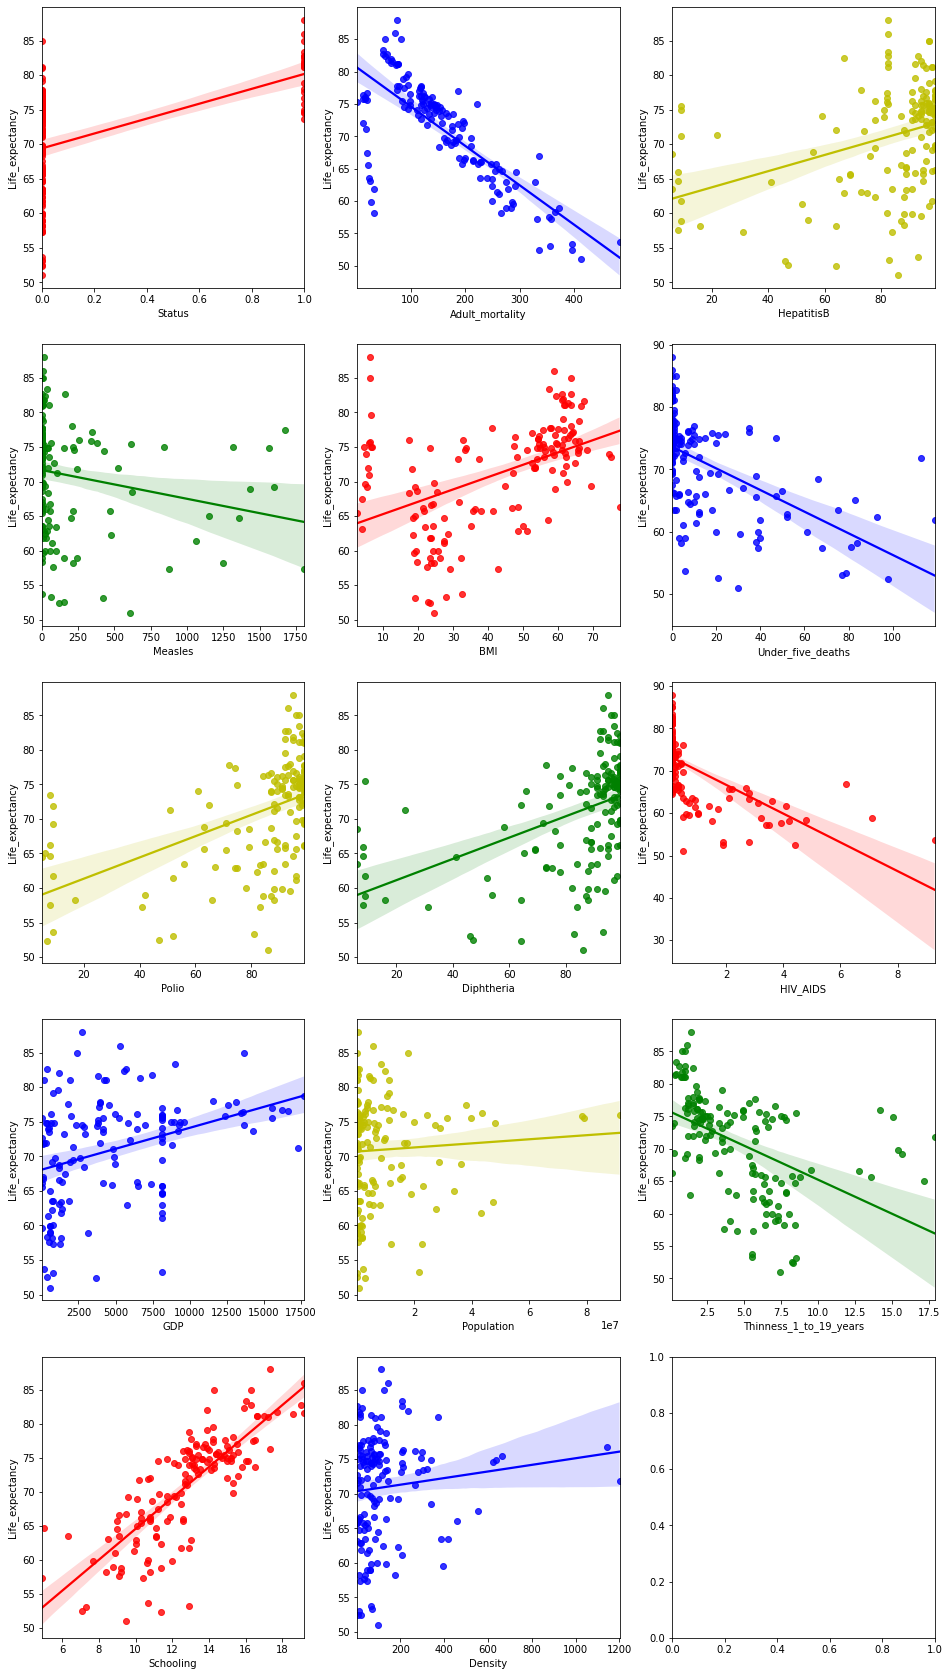

In [61]:
fig, axs = plt.subplots(figsize = (16, 30), ncols = 3, nrows = 5)
x_features = [ 'Status', 'Adult_mortality', 'HepatitisB', 'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1_to_19_years', 'Schooling', 'Density']
plot_color = ['r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'Life_expectancy', data = who, ax = axs[row][col], color = plot_color[i])

In [62]:
who.head()

,Status,Life_expectancy,Adult_mortality,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Diphtheria,HIV_AIDS,GDP,Population,Thinness_1_to_19_years,Schooling,Density
0,0,65.0,263,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,10.1,52.712072
1,0,77.8,74,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,14.2,105.135146
2,0,75.6,19,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,14.4,16.680246
3,0,52.4,335,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,11.4,22.366553
4,0,76.4,13,99.0,0,47.7,0,86,99,0.2,13566.954100,93566.0,3.3,13.9,212.650000


In [63]:
hiv_aids_data = who['HIV_AIDS']
hiv_aids_data

0      0.1
1      0.1
2      0.1
3      1.9
4      0.2
      ... 
178    0.1
179    0.1
180    0.1
181    4.1
182    6.2
Name: HIV_AIDS, Length: 151, dtype: float64

In [64]:
Y_predict

array([65.17159751, 84.1617572 , 60.51702382, 74.19754698, 73.44856214,
       72.44759492, 60.52275038, 72.19562293, 65.18445975, 69.5377041 ,
       73.87431726, 75.00353094, 78.04447549, 75.45402172, 79.94369832,
       76.79489517, 78.14068229, 52.68800197, 59.47545994, 78.73141488,
       62.05061648, 81.30280788, 69.89471457, 58.23500594, 80.59925934,
       62.56305107, 67.15122674, 73.85500817, 70.50855752, 53.07892545,
       81.82937141])

In [66]:
print('국가의 정보를 입력해주세요.')

status_new = int(input('status: '))
Adult_mortality_new = int(input('Adult_mortality: '))
HepatitisB_new = int(input('HepatitisB: '))
Measles_new = int(input('Measles: '))
BMI_new = int(input('BMI: '))
Under_five_deaths_new = int(input('Under_five_deaths: '))
Polio_new = int(input('Polio: '))
Diphtheria_new = int(input('Diphtheria: '))
HIV_AIDS_new = float(input('HIV_AIDS: '))
GDP = int(input('GDP: '))
Population = int(input('Population: '))
Thinness_1_to_19_years = int(input('Thinness_1_to_19_years: '))
Schooling = int(input('Schooling: '))
Density = int(input('Density: '))

국가의 정보를 입력해주세요.
status: 0
Adult_mortality: 100
HepatitisB: 90
Measles: 100
BMI: 30
Under_five_deaths: 10
Polio: 90
Diphtheria: 90
HIV_AIDS: 0.3
GDP: 5000
Population: 8000000
Thinness_1_to_19_years: 5
Schooling: 10
Density: 50


In [67]:
LE_predict = lm.predict([[status_new, Adult_mortality_new, HepatitisB_new, Measles_new, BMI_new, Under_five_deaths_new, Polio_new, Diphtheria_new, HIV_AIDS_new, GDP, Population, Thinness_1_to_19_years, Schooling, Density]])

In [68]:
print("이 국가의 기대 수명치는 %0.2f세 입니다." % LE_predict)

이 국가의 기대 수명치는 69.79세 입니다.
